In [0]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shreeyash6199","key":"fa0ace82f613ab882fd3fb0b94916db0"}'}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

>Now download kaggle dataset.

In [7]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 94%|██████████████████████████████████████▍  | 254M/271M [00:02<00:00, 118MB/s]
100%|█████████████████████████████████████████| 271M/271M [00:02<00:00, 132MB/s]
 99%|████████████████████████████████████████▋| 539M/544M [00:04<00:00, 189MB/s]
100%|█████████████████████████████████████████| 544M/544M [00:04<00:00, 140MB/s]
  0%|                                                | 0.00/111k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 111k/111k [00:00<00:00, 53.2MB/s]


In [38]:
!ls train

cat.0.jpg      cat.3250.jpg  cat.7751.jpg   dog.12250.jpg  dog.5500.jpg
cat.10000.jpg  cat.3251.jpg  cat.7752.jpg   dog.12251.jpg  dog.5501.jpg
cat.10001.jpg  cat.3252.jpg  cat.7753.jpg   dog.12252.jpg  dog.5502.jpg
cat.10002.jpg  cat.3253.jpg  cat.7754.jpg   dog.12253.jpg  dog.5503.jpg
cat.10003.jpg  cat.3254.jpg  cat.7755.jpg   dog.12254.jpg  dog.5504.jpg
cat.10004.jpg  cat.3255.jpg  cat.7756.jpg   dog.12255.jpg  dog.5505.jpg
cat.10005.jpg  cat.3256.jpg  cat.7757.jpg   dog.12256.jpg  dog.5506.jpg
cat.10006.jpg  cat.3257.jpg  cat.7758.jpg   dog.12257.jpg  dog.5507.jpg
cat.10007.jpg  cat.3258.jpg  cat.7759.jpg   dog.12258.jpg  dog.5508.jpg
cat.10008.jpg  cat.3259.jpg  cat.775.jpg    dog.12259.jpg  dog.5509.jpg
cat.10009.jpg  cat.325.jpg   cat.7760.jpg   dog.1225.jpg   dog.550.jpg
cat.1000.jpg   cat.3260.jpg  cat.7761.jpg   dog.12260.jpg  dog.5510.jpg
cat.10010.jpg  cat.3261.jpg  cat.7762.jpg   dog.12261.jpg  dog.5511.jpg
cat.10011.jpg  cat.3262.jpg  cat.7763.jpg   dog.12262.jpg  dog.55

In [9]:
!unzip test.zip

Archive:  test.zip
   creating: test/
  inflating: test/1.jpg              
  inflating: test/10.jpg             
  inflating: test/100.jpg            
  inflating: test/1000.jpg           
  inflating: test/10000.jpg          
  inflating: test/10001.jpg          
  inflating: test/10002.jpg          
  inflating: test/10003.jpg          
  inflating: test/10004.jpg          
  inflating: test/10005.jpg          
  inflating: test/10006.jpg          
  inflating: test/10007.jpg          
  inflating: test/10008.jpg          
  inflating: test/10009.jpg          
  inflating: test/1001.jpg           
  inflating: test/10010.jpg          
  inflating: test/10011.jpg          
  inflating: test/10012.jpg          
  inflating: test/10013.jpg          
  inflating: test/10014.jpg          
  inflating: test/10015.jpg          
  inflating: test/10016.jpg          
  inflating: test/10017.jpg          
  inflating: test/10018.jpg          
  inflating: test/10019.jpg          
  inflating:

In [10]:
!unzip train.zip

Archive:  train.zip
   creating: train/
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.10.jpg        
  inflating: train/cat.100.jpg       
  inflating: train/cat.1000.jpg      
  inflating: train/cat.10000.jpg     
  inflating: train/cat.10001.jpg     
  inflating: train/cat.10002.jpg     
  inflating: train/cat.10003.jpg     
  inflating: train/cat.10004.jpg     
  inflating: train/cat.10005.jpg     
  inflating: train/cat.10006.jpg     
  inflating: train/cat.10007.jpg     
  inflating: train/cat.10008.jpg     
  inflating: train/cat.10009.jpg     
  inflating: train/cat.1001.jpg      
  inflating: train/cat.10010.jpg     
  inflating: train/cat.10011.jpg     
  inflating: train/cat.10012.jpg     
  inflating: train/cat.10013.jpg     
  inflating: train/cat.10014.jpg     
  inflating: train/cat.10015.jpg     
  inflating: train/cat.10016.jpg     
  inflating: train/cat.10017.jpg     
  inflating: train/cat.10018.jpg     
  inflatin



*   import all required libraries 
*   we will use tensorflow layers framework.



In [0]:
import os
import cv2
import random
import numpy
import pickle
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras import layers
%matplotlib inline



> **Preprocessing Images**

> >resizing images to shape (100,100,3) and then storing dataset into a numpy array. OpenCV is used for basic processing on images.



In [0]:
images = []
labels = []

for img in os.listdir('train/'):
    path = "train/" + str(img) 
    image = cv2.imread(str(path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(64,64))
    images.append(image)
    if img[:3] == "cat":                  # cat >> 0
        labels.append(int(0))
    elif img[:3] == "dog":                # dog >> 1
        labels.append(int(1))

images = numpy.array(images)
labels = numpy.array(labels)        

> > Note that here I am reshaping y_train and y_test array to [-1,1] because it will convert its shape from (?, ) to (?, 1). It will reduce future errors. 

In [0]:
import sklearn.cross_validation
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(images, labels, test_size=0.05)
y_train = numpy.asarray(y_train, dtype = 'int')
y_train = numpy.reshape(y_train,[-1,1])
y_test = numpy.reshape(y_test,[-1,1])


array([0])

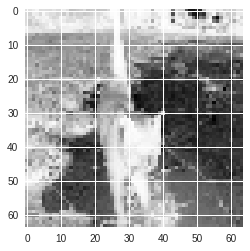

In [42]:
gray = cv2.cvtColor(X_test[1], cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
y_test[1]

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
model = Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=3,activation=layers.activations.relu,data_format='channels_last',input_shape=[64,64,3]))
model.add(layers.MaxPool2D(pool_size=2,strides=2))
model.add(layers.Conv2D(filters=64, kernel_size=3,activation=layers.activations.relu))
model.add(layers.MaxPool2D(pool_size=2,strides=2))
model.add(layers.Conv2D(filters=128, kernel_size=3,activation=layers.activations.relu))
model.add(layers.MaxPool2D(pool_size=2,strides=2))
model.add(layers.Conv2D(filters=512, kernel_size=3,activation=layers.activations.relu))
model.add(layers.MaxPool2D(pool_size=2,strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation=layers.activations.relu))
model.add(layers.Dense(128,activation=layers.activations.relu))
model.add(layers.Dense(2, activation=layers.activations.softmax))

In [0]:
model.compile(optimizer = keras.optimizers.Adam(lr=1e-5),loss = keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [0]:
from keras.callbacks import TensorBoard
from time import time
tensorboard_ = TensorBoard(log_dir="logs/{}".format(time()))

In [58]:
model.fit(x=X_train, y=y_train, batch_size=128, epochs=50,verbose=2,validation_split = 0.1, callbacks=[tensorboard_])


Train on 21375 samples, validate on 2375 samples
Epoch 1/50
 - 9s - loss: 0.5718 - acc: 0.7070 - val_loss: 0.5674 - val_acc: 0.7086
Epoch 2/50
 - 9s - loss: 0.5661 - acc: 0.7105 - val_loss: 0.5644 - val_acc: 0.7015
Epoch 3/50
 - 9s - loss: 0.5589 - acc: 0.7156 - val_loss: 0.5589 - val_acc: 0.7069
Epoch 4/50
 - 8s - loss: 0.5498 - acc: 0.7223 - val_loss: 0.5496 - val_acc: 0.7200
Epoch 5/50
 - 8s - loss: 0.5456 - acc: 0.7282 - val_loss: 0.5444 - val_acc: 0.7175
Epoch 6/50
 - 8s - loss: 0.5388 - acc: 0.7302 - val_loss: 0.5404 - val_acc: 0.7272
Epoch 7/50
 - 8s - loss: 0.5296 - acc: 0.7399 - val_loss: 0.5328 - val_acc: 0.7322
Epoch 8/50
 - 9s - loss: 0.5245 - acc: 0.7429 - val_loss: 0.5290 - val_acc: 0.7305
Epoch 9/50
 - 8s - loss: 0.5191 - acc: 0.7466 - val_loss: 0.5230 - val_acc: 0.7364
Epoch 10/50
 - 8s - loss: 0.5131 - acc: 0.7504 - val_loss: 0.5144 - val_acc: 0.7461
Epoch 11/50
 - 8s - loss: 0.5071 - acc: 0.7546 - val_loss: 0.5157 - val_acc: 0.7469
Epoch 12/50
 - 8s - loss: 0.5022 - a

In [0]:
model2 = Sequential()
model2.add(layers.Conv2D(filters=32, kernel_size=3,activation=layers.activations.relu,data_format='channels_last',input_shape=[64,64,3]))
model2.add(layers.MaxPool2D(pool_size=2,strides=2))
model2.add(layers.Conv2D(filters=64, kernel_size=3,activation=layers.activations.relu))
model2.add(layers.MaxPool2D(pool_size=2,strides=2))
model2.add(layers.Flatten())
model2.add(layers.Dense(128,activation=layers.activations.relu))
model2.add(layers.Dense(128,activation=layers.activations.relu))
model2.add(layers.Dense(2, activation=layers.activations.softmax))
model.compile(optimizer = keras.optimizers.Adam(lr=1e-5),loss = keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
model.fit(x=X_train, y=y_train, batch_size=128, epochs=50,verbose=2,validation_split = 0.1)